In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.datasets import load_boston

In [2]:
iris_dataset=load_iris()
print("Ключи load_dataset:\n", iris_dataset.keys())

Ключи load_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris_df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dict_class=dict(zip(range(3),iris_dataset['target_names']))
df_full=pd.concat([pd.DataFrame(iris_dataset['target'],columns=['class']), 
                   iris_df], axis=1).replace({'class': dict_class})
df_full.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## Построим самую простую модель

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)


print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.964
тестовый: 1.000


## Препроцессинг (пересмасштабирование) данных

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЧНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.955
тестовый: 1.000


## Метрики результатов


In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=19)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# предскажем значение тренировочный и тестовых y
y_pred_train=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

knn_train=knn.score(X_train_scaled , y_train)
knn_test=knn.score(X_test_scaled , y_test)
print("тренировочный: {:.3f}".format(knn_train))
print("тестовый: {:.3f}".format(knn_test))

# Проверим тренировочный набор (не всегда нужно делать)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred_train==y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))

тренировочный: 0.973
тестовый: 0.921
Правильность на тестовом наборе: 0.973
Правильность на тестовом наборе: 0.921


## Поиск оптимального параметра

[1.    0.964 0.955 0.955 0.955 0.955 0.964 0.964 0.955]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


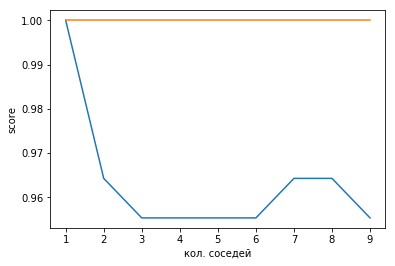

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42) 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

sc_train=[]
sc_test=[]

ran=range(1,10)

for r in ran:
    knn = KNeighborsClassifier(n_neighbors=r)
    knn.fit(X_train_scaled, y_train)
    sc_train=np.append(sc_train,knn.score(X_train_scaled ,y_train))
    sc_test=np.append(sc_test, knn.score(X_test_scaled ,y_test)) 
    y_pred=knn.predict(X_test_scaled)
    
    
np.set_printoptions(precision=3)
print(sc_train)
print(sc_test)

fig, ax1 = plt.subplots()
ax1.plot(ran,sc_train,ran,sc_test)
ax1.set_xlabel('кол. соседей')
ax1.set_ylabel('score')
plt.show()

# Построим контейнеры

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, minmax_scale, Normalizer, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=42, test_size=0.2)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 5]
p=[1, 2, 3, 4, 6, 8, 10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer(), None],#, QuantileTransformer(), PowerTransformer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)


----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform'), 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform', 'preprocessing': Normalizer(copy=True, norm='l2')}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.983333

Правильность для наилучшей модели на тестовом наборе: 1.000000



,238,298,248,228,308,218,313,318,348,323,...,262,122,322,342,92,332,252,242,132,257
mean_fit_time,0.00156379,0,0,0.000599861,0.0005018,0.00156381,0.000702262,0,0.000500584,0,...,0.000803065,0.000801969,0.000496221,0,0.00156384,0.000803828,0.00312774,0,0.00156274,0.000501704
std_fit_time,0.00469136,0,0,0.000489804,0.0005018,0.00469143,0.000459738,0,0.000500842,0,...,0.00060231,0.000401,0.000496317,0,0.00469151,0.000402197,0.00625548,0,0.00468822,0.000501704
mean_score_time,0,0,0,0.000703406,0.000501609,0,0.000602055,0.00156381,0.000900412,0,...,0.00050168,0.00060215,0.000612617,0.00156374,0,0.000700164,0,0.00469141,0.00156486,0.000501609
std_score_time,0,0,0,0.000643233,0.000501609,0,0.000491576,0.00469143,0.000300474,0,...,0.00050168,0.000491657,0.000501824,0.00469122,0,0.000458414,0,0.00716625,0.00469458,0.000501609
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,4,5,4,4,5,4,5,5,5,5,...,4,2,5,5,2,5,4,4,2,4
param_classifier__p,3,2,4,2,3,1,4,4,10,6,...,8,8,6,10,3,8,6,4,10,6
param_classifier__weights,distance,distance,distance,distance,distance,distance,uniform,distance,distance,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,distance
param_preprocessing,"Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')","Normalizer(copy=True, norm='l2')",...,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ..."
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': 

In [13]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Прогнозируемые метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Прогнозируемые метки: [1]
Правильность на тестовом наборе: 0.30


In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.97


In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.87


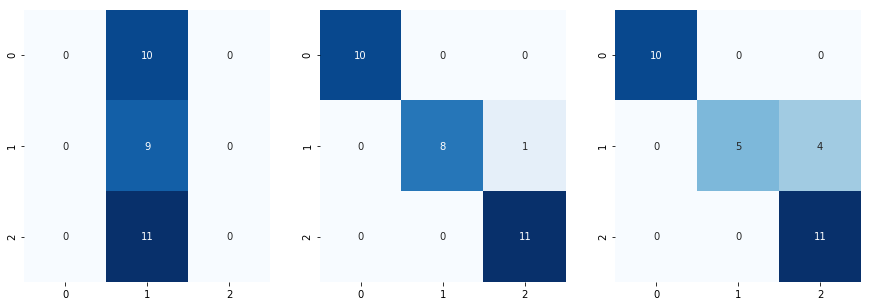

In [17]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,pred_most_frequent)
matrix_2=confusion_matrix(y_test,pred_tree)
matrix_3=confusion_matrix(y_test,pred_logreg)

fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");

In [18]:
display(matrix_1)
display(matrix_2)
display(matrix_3)

array([[ 0, 10,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

array([[10,  0,  0],
       [ 0,  5,  4],
       [ 0,  0, 11]], dtype=int64)

In [20]:
from sklearn.metrics import f1_score
print("f1 score наибольшая частота: {:.2f}".format(
    f1_score(y_test, pred_most_frequent, average='macro')))
print("f1 score дерево: {:.2f}".format(f1_score(y_test, pred_tree, average='macro')))
print("f1 score логистическая регрессия: {:.2f}".format(
    f1_score(y_test, pred_logreg, average='macro')))

f1 score наибольшая частота: 0.15
f1 score дерево: 0.97
f1 score логистическая регрессия: 0.85


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
from sklearn.metrics import classification_report
print('--------- Дерево ------------')
print(classification_report(y_test, pred_tree,
                            target_names=["НЕ девять", "Девять"]))
print(' ')
print('--------- Лог. регрессия ------------')
print(classification_report(y_test, pred_logreg,
                            target_names=["НЕ девять", "Девять"]))

--------- Дерево ------------
             precision    recall  f1-score   support

  НЕ девять       1.00      1.00      1.00        10
     Девять       1.00      0.89      0.94         9

avg / total       0.97      0.97      0.97        30

 
--------- Лог. регрессия ------------
             precision    recall  f1-score   support

  НЕ девять       1.00      1.00      1.00        10
     Девять       1.00      0.56      0.71         9

avg / total       0.90      0.87      0.86        30



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 2
  .format(len(labels), len(target_names))
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 2
  .format(len(labels), len(target_names))


In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)
reg = LogisticRegression(C=0.1).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, reg.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ValueError: multiclass format is not supported

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

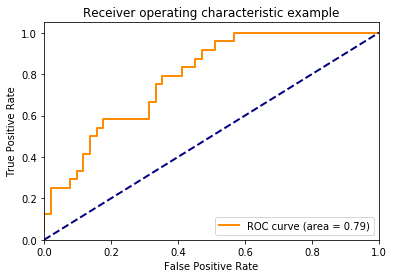

In [28]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

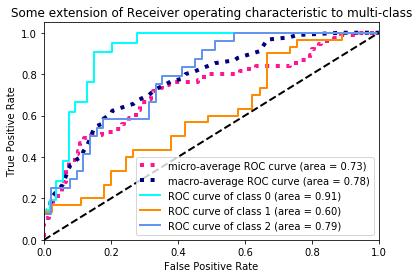

In [29]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()